In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

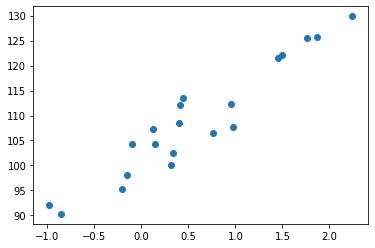

In [3]:
plt.scatter(X, y)

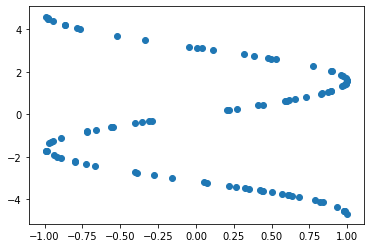

In [4]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [12.44002424]
y-axis intercept:  101.89622505659258


### Linear Model
Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$


### Predictions

In [9]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 98.01970393090812
Predicted output: 100.01333771669648
Prediction Error: 1.9936337857883615


In [10]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,100.013338,98.019704,1.993634
1,106.874190,108.458654,-1.584464
2,114.071749,107.776544,6.295205
3,91.271253,90.315201,0.956053
4,89.738865,92.047965,-2.309101
5,105.790795,100.144726,5.646069
6,100.612180,104.371286,-3.759106
7,99.344051,95.208967,4.135085
8,106.047142,102.505262,3.541880
9,120.482605,122.119661,-1.637056


In [11]:
x_min = X.min()
x_max = X.max()

In [12]:
y_min_actual = y.min()
y_max_actual = y.max()

In [13]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 90.31520078064568
Calculated Min Value: 89.73886454212163
Actual Max Value: 129.85715020208258
Calculated Max Value: 129.7729907743173


In [14]:
y_min_predicted = model.predict(x_min.reshape(-1, 1))
y_max_predicted = model.predict(x_max.reshape(-1, 1))
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 90.31520078064568
Predicted Min Value: [89.73886454]
Actual Max Value: 129.85715020208258
Predicted Max Value: [129.77299077]


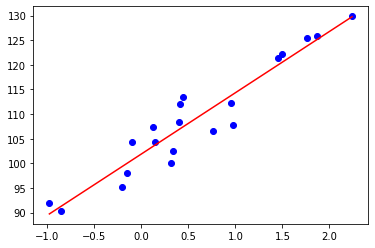

In [15]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')